In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skgstat import models
from scipy.optimize import curve_fit

In [18]:
ND = None
data = [[44, ND, 40, 42, 40, 39, 37, 36, ND],
        [42, ND, 43, 42, 39, 39, 41, 40, 36],
        [37, 37, 37, 35, 38, 37, 37, 33, 34],
        [35, 38, ND, 35, 37, 36, 36, 35, ND],
        [36, 35, 36, 35, 39, 33, 32, 29, 28],
        [38, 37, 35, ND, 30, ND, 29, 30, 32]]

h = [100, 200, 300, 400, 500]

In [19]:
# Calculate the semivariogram for horizontal, vertical, inclined lags

def horizontal(data, lag):
    """
    Calculate the semivariogram for horizontal lags.
    """
    n = len(data)
    m = len(data[0])
    s = 0
    p = 0
    for i in range(n):
        for j in range(m-lag):
            if data[i][j] != ND and data[i][j+lag] != ND:
                s += (data[i][j] - data[i][j+lag])**2
                p += 1
    return s/(2*p)


def vertical(data, lag):
    """
    Calculate the semivariogram for vertical lags.
    """
    n = len(data)
    m = len(data[0])
    s = 0
    p = 0
    for i in range(n-lag):
        for j in range(m):
            if data[i][j] != ND and data[i+lag][j] != ND:
                s += (data[i][j] - data[i+lag][j])**2
                p += 1
    return s/(2*p)


def inclined(data, lag):
    """
    Calculate the semivariogram for inclined lags.
    """
    n = len(data)
    m = len(data[0])
    s = 0
    p = 0
    for i in range(n-lag):
        for j in range(m-lag):
            if data[i][j] != ND and data[i+lag][j+lag] != ND:
                s += (data[i][j] - data[i+lag][j+lag])**2
                p += 1
    return s/(2*p)

In [20]:
# Plot the semivariogram for horizontal, vertical, inclined lags.

def semivariogram_plot(semivariance, label):
    """
    Plot the semivariance data. 
    """
    initial_parameters = [np.mean(h), np.mean(semivariance), 0]
    cof, cov = curve_fit(models.gaussian, h, semivariance, initial_parameters)
    print("%s [range: %.2f   sill: %.f   nugget: %.2f]\n" % (label, cof[0], cof[1], cof[2]))
    xi = np.linspace(h[0], h[-1])
    yi = [models.gaussian(h, *cof) for h in xi]

    plt.figure(figsize=(10, 6))
    plt.plot(h, semivariance, 'ob')
    plt.plot(xi, yi, 'r')
    plt.ylabel('Semivariance')
    plt.xlabel('h - Lags')
    plt.title(label)
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

In [21]:
# Calculate the semivariogram for horizontal, vertical, inclined lags

semi_variance = {
    'horizontal': [horizontal(data, i) for i in range(1, 6)],
    'vertical': [vertical(data, i) for i in range(1, 6)],
    'inclined': [inclined(data, i) for i in range(1, 6)]
}

Horizontal Semivariogram [range: 681.70   sill: 9   nugget: 1.55]



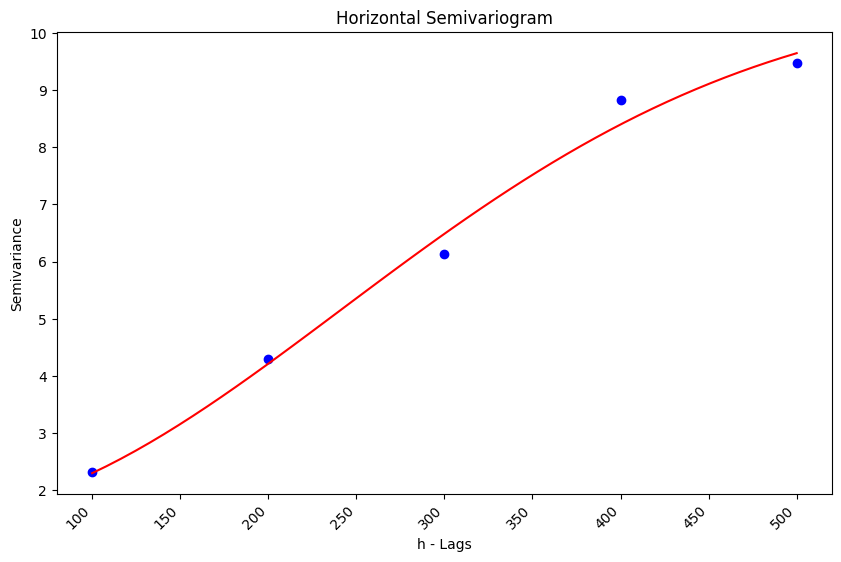

Vertical Semivariogram [range: 670.93   sill: 27   nugget: 2.83]



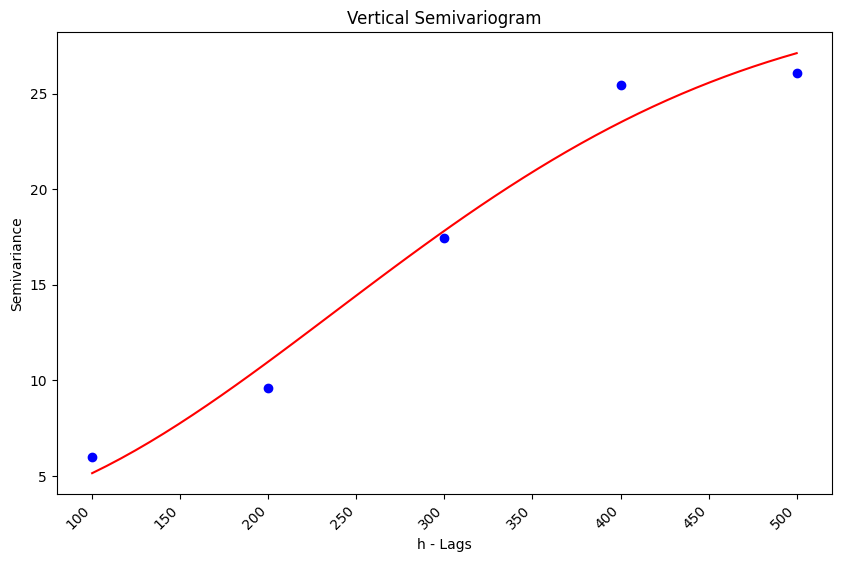

Inclined Semivariogram [range: 647.54   sill: 64   nugget: -2.13]



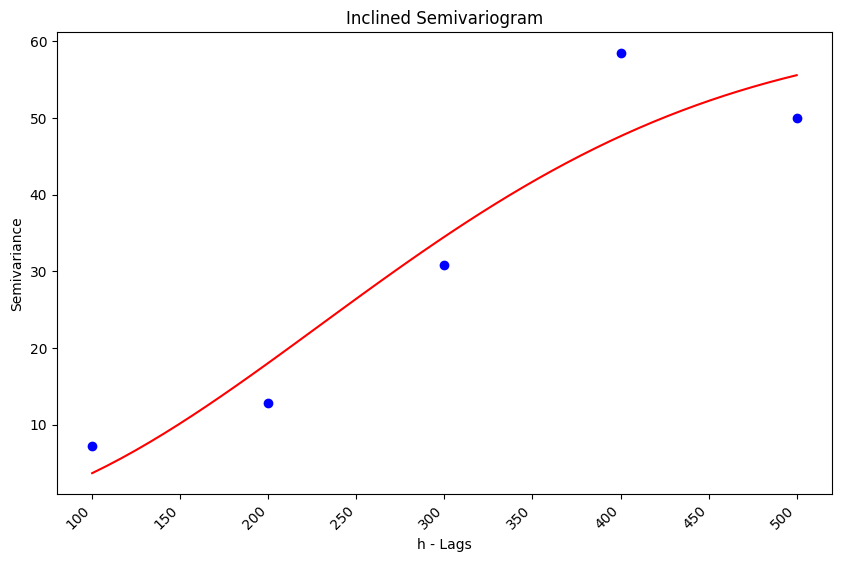

In [22]:
# Plot the semivariogram for horizontal, vertical, inclined lags.

semivariogram_plot(semi_variance["horizontal"] , 'Horizontal Semivariogram')
semivariogram_plot(semi_variance["vertical"], 'Vertical Semivariogram')
semivariogram_plot(semi_variance["inclined"], 'Inclined Semivariogram')